#Install Required Libraries

In [1]:
# Install scikit-learn if not already available (usually pre-installed in Colab)
!pip install scikit-learn seaborn joblib --quiet

#Import Libraries

In [2]:
# Import necessary libraries for data handling, modeling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#Load the Iris Dataset

In [3]:
# Load the Iris dataset from scikit-learn
iris = load_iris(as_frame=True)  # Returns a Bunch object with DataFrame

# Create a DataFrame combining features and target
df = iris.frame
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Map target numbers to species names for better readability
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

Dataset Shape: (150, 5)

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#Basic Statistical Summary

In [4]:
# Display descriptive statistics for numerical features grouped by species
print("Descriptive Statistics by Species:")
display(df.groupby('species').describe().T)

Descriptive Statistics by Species:


species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

#Exploratory Data Analysis - Visualizations

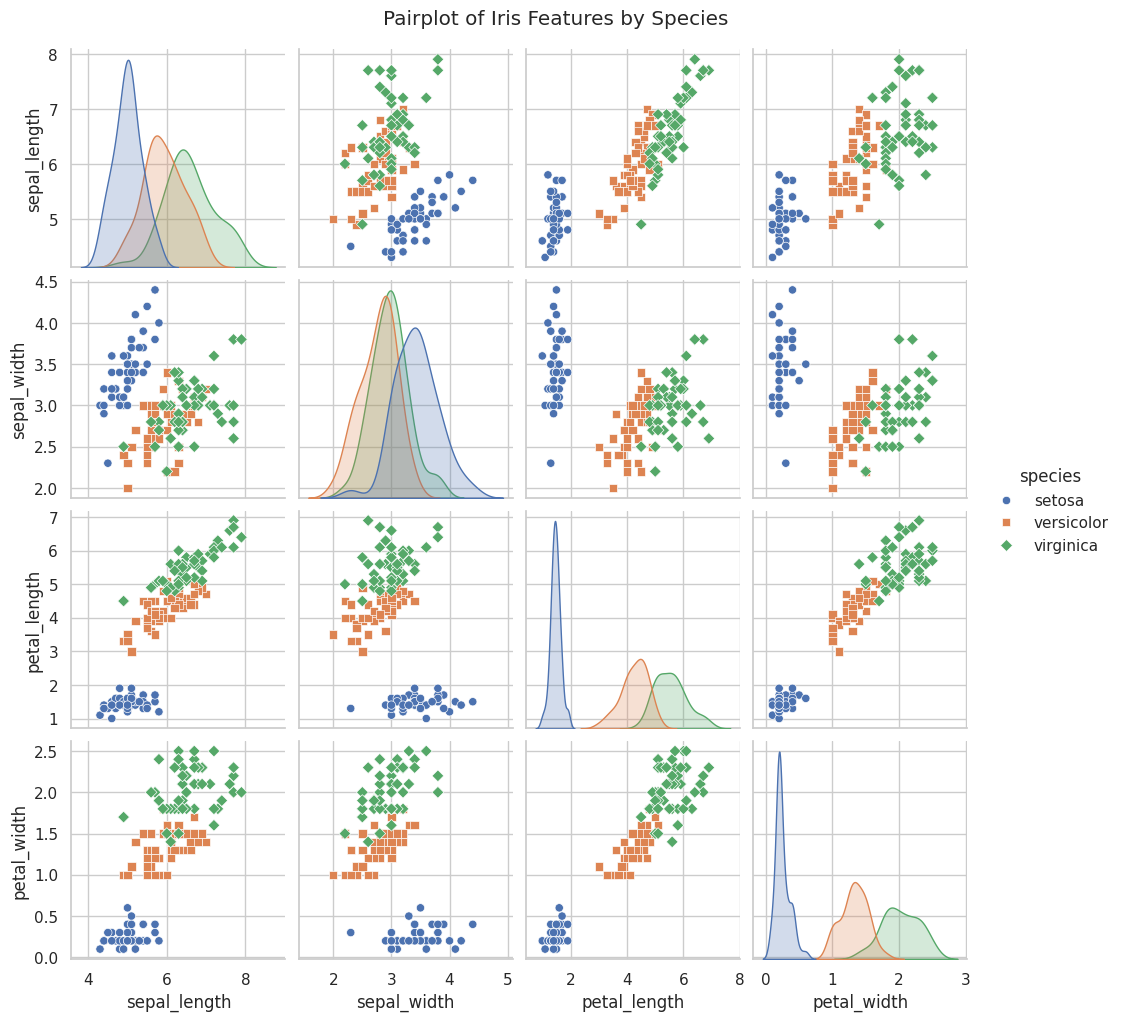

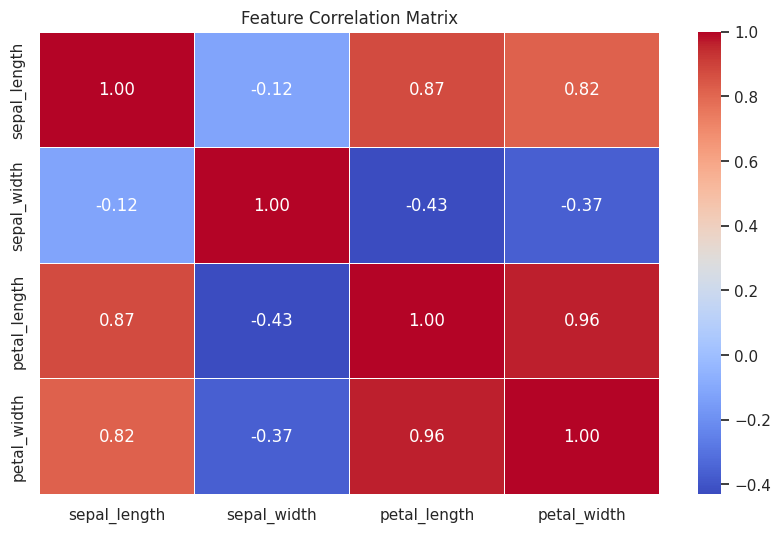

In [6]:
# Pairplot to visualize relationships between features, colored by species
sns.pairplot(df, hue='species', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

# Correlation matrix heatmap
plt.figure()
corr = df.iloc[:, :-1].corr()  # Exclude species column
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

#Additional Key Scatter Plots

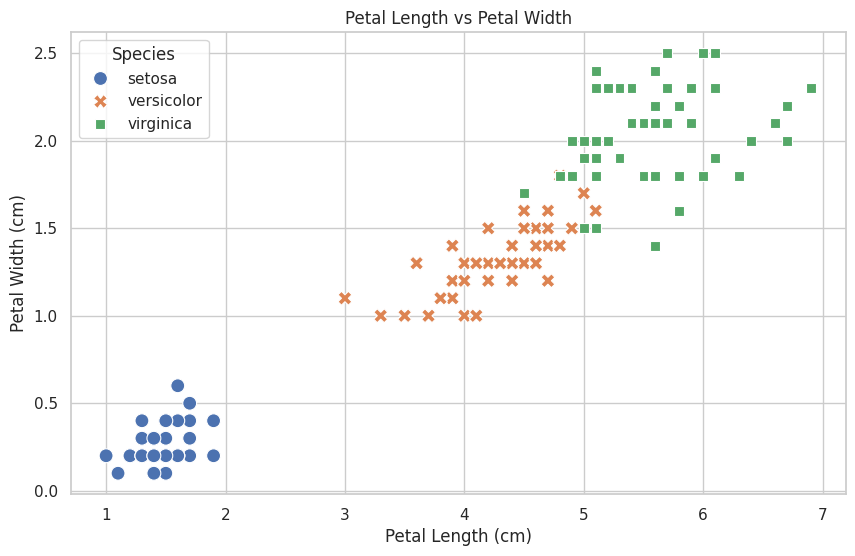

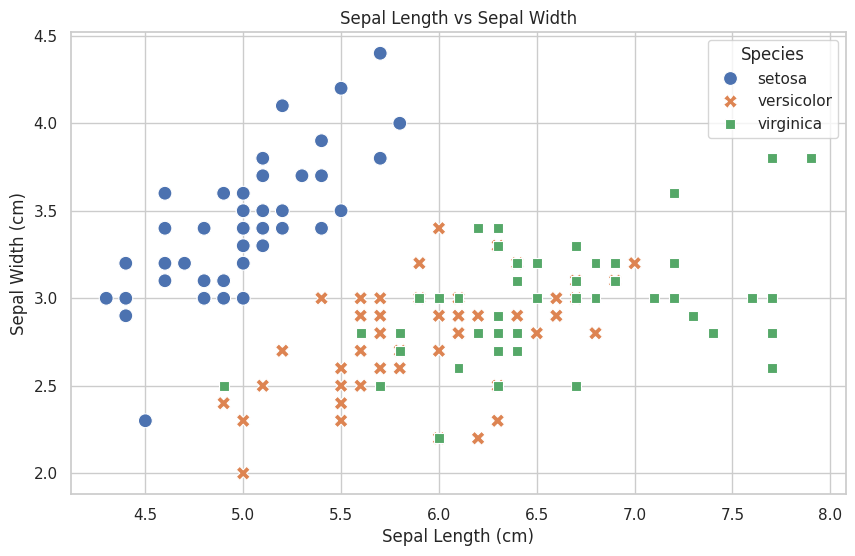

In [7]:
# Scatter plot: Petal Length vs Petal Width (most separable features)
plt.figure()
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', style='species', s=100)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()

# Scatter plot: Sepal Length vs Sepal Width
plt.figure()
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()

#Prepare Data for Modeling

In [8]:
# Separate features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split into training and testing sets (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


#Train and Evaluate Logistic Regression

Logistic Regression Results:
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



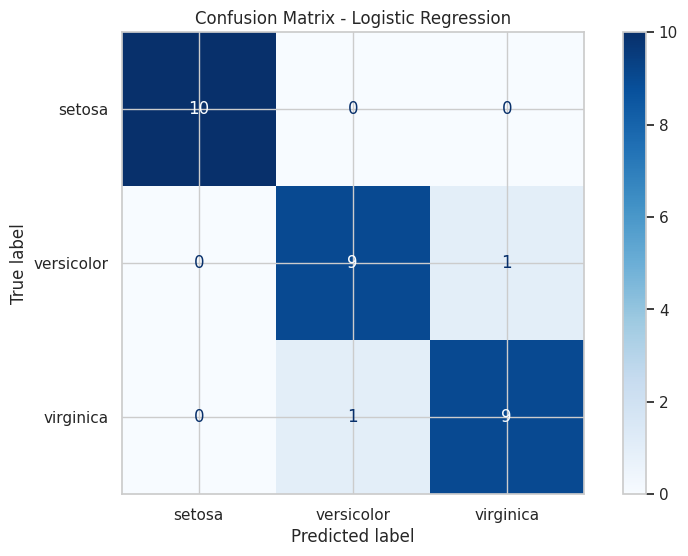

In [9]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr, display_labels=lr_model.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#Visualize Decision Tree Structure

Decision Tree re-trained successfully for visualization.


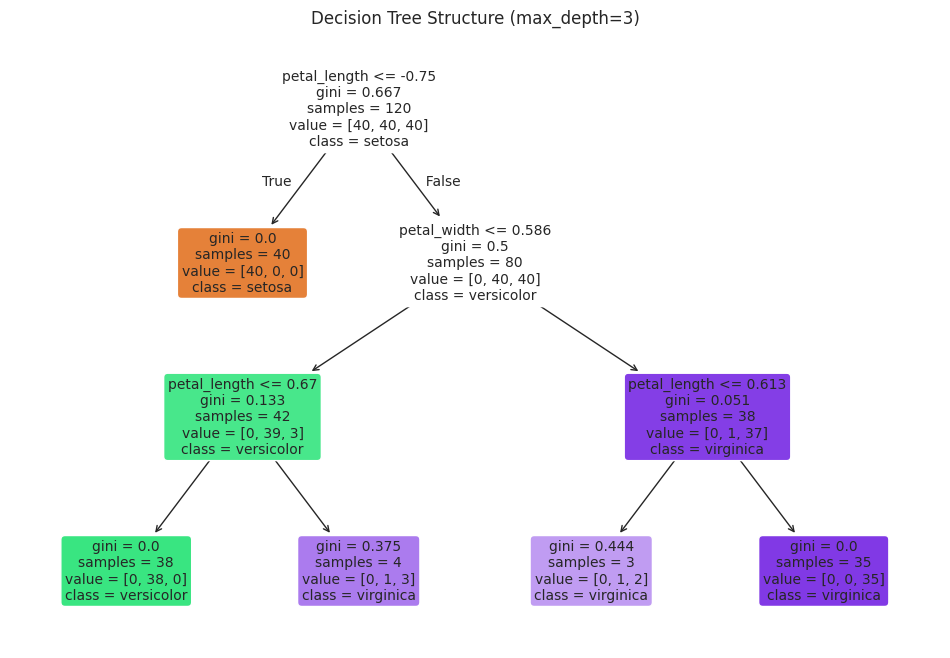

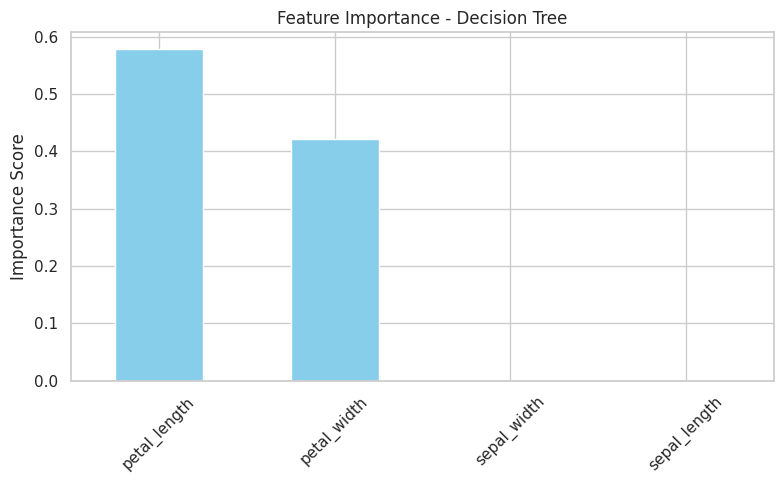

Feature Importance Ranking:
petal_length    0.579077
petal_width     0.420923
sepal_width     0.000000
sepal_length    0.000000
dtype: float64


In [11]:
# Ensure the Decision Tree model is trained (re-train if needed)
# This prevents NameError if previous cells were not executed

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Decision Tree re-trained successfully for visualization.")

# Plot the trained Decision Tree structure
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=dt_model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure (max_depth=3)")
plt.show()

# Display feature importance
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Decision Tree")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print numerical importance values
print("Feature Importance Ranking:")
print(importances)

#Model Comparison Summary

In [13]:
# Re-train or ensure both models and their predictions are available

# Logistic Regression (re-train if needed)
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Decision Tree (re-train if needed)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Both models re-trained and predictions generated successfully.")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Test Accuracy': [lr_accuracy, dt_accuracy]
})

# Sort by accuracy in descending order
comparison_df = comparison_df.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# Display the comparison table
print("Model Performance Comparison on Test Set")
display(comparison_df)

# Select the best model for deployment
if dt_accuracy >= lr_accuracy:
    best_model = dt_model
    best_model_name = "Decision Tree"
else:
    best_model = lr_model
    best_model_name = "Logistic Regression"

print(f"\nSelected best model for deployment: {best_model_name} (Accuracy: {max(lr_accuracy, dt_accuracy):.4f})")

Both models re-trained and predictions generated successfully.
Model Performance Comparison on Test Set


,Model,Test Accuracy
0,Decision Tree,0.966667
1,Logistic Regression,0.933333



Selected best model for deployment: Decision Tree (Accuracy: 0.9667)


#Save Model and Scaler for Deployment

In [14]:
# Save the selected best model and the fitted scaler for future use
joblib.dump(best_model, 'iris_classifier_model.pkl')
joblib.dump(scaler, 'iris_scaler.pkl')

print("Model and scaler have been successfully saved to disk:")
print("- 'iris_classifier_model.pkl'  → Selected best model (Decision Tree)")
print("- 'iris_scaler.pkl'            → Fitted StandardScaler")

# Verify file creation and sizes
import os

print("\nVerification of saved files:")
for filename in ['iris_classifier_model.pkl', 'iris_scaler.pkl']:
    if os.path.exists(filename):
        size = os.path.getsize(filename)
        print(f"  ✓ {filename} ({size:,} bytes)")
    else:
        print(f"  ✗ {filename} (not found)")

Model and scaler have been successfully saved to disk:
- 'iris_classifier_model.pkl'  → Selected best model (Decision Tree)
- 'iris_scaler.pkl'            → Fitted StandardScaler

Verification of saved files:
  ✓ iris_classifier_model.pkl (2,305 bytes)
  ✓ iris_scaler.pkl (1,015 bytes)


#Reusable Prediction Function

In [15]:
# Define a reusable function to predict species for new measurements
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict the Iris species and return probabilities for a new sample.

    Parameters:
        sepal_length (float): Sepal length in cm
        sepal_width  (float): Sepal width in cm
        petal_length (float): Petal length in cm
        petal_width  (float): Petal width in cm

    Returns:
        predicted_species (str): Capitalized predicted species name
        probabilities (dict): Probability for each class
    """
    # Load the saved model and scaler
    model = joblib.load('iris_classifier_model.pkl')
    scaler = joblib.load('iris_scaler.pkl')

    # Prepare input data
    new_sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    new_sample_scaled = scaler.transform(new_sample)

    # Predict
    prediction = model.predict(new_sample_scaled)[0]
    probabilities = model.predict_proba(new_sample_scaled)[0]

    # Create readable probability dictionary
    prob_dict = {species.capitalize(): float(prob)
                 for species, prob in zip(model.classes_, probabilities)}

    return prediction.capitalize(), prob_dict

# Test the function with a few examples
print("Prediction Function Tests:\n")

test_samples = [
    (5.1, 3.5, 1.4, 0.2),  # Should be Setosa
    (6.3, 2.9, 5.6, 1.8),  # Should be Virginica
    (5.9, 3.0, 4.2, 1.5)   # Should be Versicolor
]

for i, sample in enumerate(test_samples, 1):
    pred, probs = predict_iris_species(*sample)
    print(f"Sample {i}: Measurements {sample}")
    print(f"   Predicted Species: {pred}")
    print(f"   Probabilities: { {k: f'{v:.4f}' for k, v in probs.items()} }\n")

Prediction Function Tests:

Sample 1: Measurements (5.1, 3.5, 1.4, 0.2)
   Predicted Species: Setosa
   Probabilities: {'Setosa': '1.0000', 'Versicolor': '0.0000', 'Virginica': '0.0000'}

Sample 2: Measurements (6.3, 2.9, 5.6, 1.8)
   Predicted Species: Virginica
   Probabilities: {'Setosa': '0.0000', 'Versicolor': '0.0000', 'Virginica': '1.0000'}

Sample 3: Measurements (5.9, 3.0, 4.2, 1.5)
   Predicted Species: Versicolor
   Probabilities: {'Setosa': '0.0000', 'Versicolor': '1.0000', 'Virginica': '0.0000'}

